In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json

# Import API key
import api_keys

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

weather_df = pd.DataFrame([])

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        weather_df = weather_df.append(pd.DataFrame({"City": city, "latitude":lat_lng[0], "longitude":lat_lng[1]}, index=[0]), ignore_index=True)

# Print the city count to confirm sufficient count
len(cities)

589

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

In [5]:
#Assign the parameters
units = "Imperial"
params = {"appid":  api_keys.api_key,
         "units" : units,
         "q" : ""}

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in weather_df.iterrows():
    params["q"]= row["City"]
    response = requests.get(url, params=params).json()
    try:
        weather_df.loc[index,"Temperature"] = response["main"]["temp_max"]  
        weather_df.loc[index,"Humidity"] = response["main"]["humidity"]      
        weather_df.loc[index,"Cloudiness"] = response["clouds"]["all"]    
        weather_df.loc[index,"Wind Speed"] = response["wind"]["speed"] 
    except:
        pass

In [6]:
weather_df

,City,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,kapaa,15.676364,-175.123156,80.06,78.0,75.0,4.70
1,busselton,-77.794268,75.865689,57.71,100.0,64.0,17.02
2,hobart,-76.203157,143.158696,50.00,87.0,75.0,1.92
3,torbay,44.788274,-41.957410,50.00,71.0,75.0,6.93
4,rikitea,-84.444066,-124.679096,67.52,100.0,100.0,20.04
5,qaanaaq,82.301013,-95.375045,19.91,100.0,0.0,13.44
6,camacha,33.869314,-13.509995,73.40,78.0,20.0,9.17
7,francistown,-21.030208,27.827689,69.80,21.0,0.0,5.82
8,petukhovo,54.585045,67.552122,47.27,65.0,0.0,14.00
9,saint-francois,16.594228,-59.332047,73.40,43.0,0.0,2.24


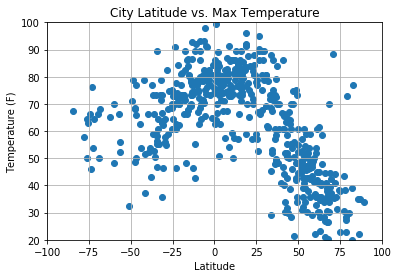

In [7]:
plt.scatter(weather_df["latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100, 100)
plt.ylim(20, 100)

#Show plot
plt.show()

In [8]:
# Analysis : the farther away from 0 latitude you get the colder it gets. 

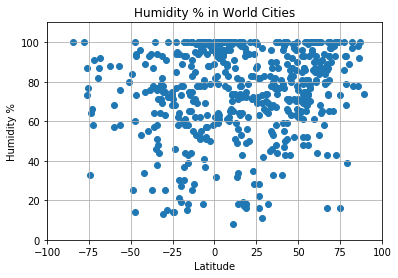

In [9]:
plt.scatter(weather_df["latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity % in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100, 100)
plt.ylim(0, 110)

#Show plot
plt.show()

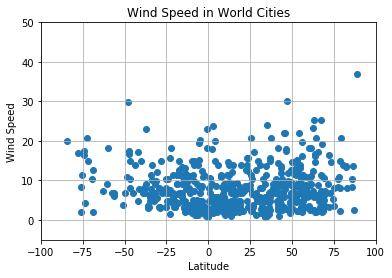

In [10]:
plt.scatter(weather_df["latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100, 100)
plt.ylim(-5, 50)

#Show plot
plt.show()

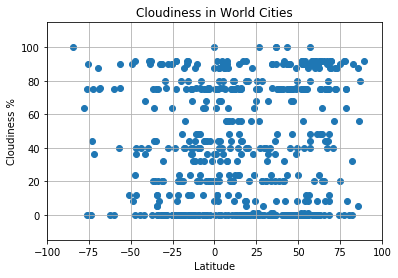

In [11]:
plt.scatter(weather_df["latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100, 100)
plt.ylim(-15, 115)

#Show plot
plt.show()